<a href="https://colab.research.google.com/github/manurk1998/ML_Datasc/blob/main/MY_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

for more details:-
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015

In [ ]:
# importing required  librararies......
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from  sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
df=pd.read_csv("/content/aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
# To check for the null  values are present
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
#to fill the missing values
df["gender"]=df["gender"].fillna(df["gender"].mode()[0])
#df["enrolled_university"].fillna(df["enrolled_university"].mode()[0])
lst=["enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job"]
for i in lst:
  df[i]=df[i].fillna(df[i].mode()[0])


In [ ]:
# To identify the type of records in the dataset
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [ ]:
#to remove "city_" in column "city" to convert it into float datatype
df["city"]=df["city"].str.replace("city_","")
df["city"]=df["city"].astype(float)

In [ ]:
# now to convert the object values to numeric data type using label encoder
le=LabelEncoder()
lst_le=["gender","relevent_experience","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job"]
for i in lst_le:
  df[i]=le.fit_transform(df[i])


In [ ]:
df["education_level"].isna().sum()

0

In [ ]:
df["relevent_experience"].value_counts()

0    13792
1     5366
Name: relevent_experience, dtype: int64

In [ ]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

So all the missing values are filled and string values are converted to intgers or float type

In [ ]:
df.count()

enrollee_id               19158
city                      19158
city_development_index    19158
gender                    19158
relevent_experience       19158
enrolled_university       19158
education_level           19158
major_discipline          19158
experience                19158
company_size              19158
company_type              19158
last_new_job              19158
training_hours            19158
target                    19158
dtype: int64

In [ ]:
df["target"].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

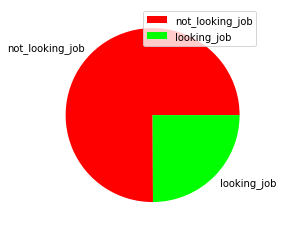

In [97]:
newlabels=["not_looking_job","looking_job"]
color=["#FF0000","#00FF00"]
plt.pie(df["target"].value_counts(),labels=newlabels,colors=color)
plt.legend()
plt.show()

# here we can see that the data is imbalanced so we can use either over/under sampling

before that we can try out the dataset without data sampling to check out the diiference in output

In [ ]:
#splitting dataset as attributes "X" and output as " y "
X=df.iloc[:,1:13]
y=df.iloc[:,-1]
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [ ]:
# scaling values using minmax or svc
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 0.49278091,  0.73891926,  0.20423458, ...,  0.3935561 ,
        -0.90218896, -0.4889846 ],
       [-0.86461617, -0.42840976,  0.20423458, ...,  0.3935561 ,
         1.16436445, -0.30582494],
       [-1.27398989, -1.66059039,  0.20423458, ...,  0.3935561 ,
         1.68100281,  0.29360665],
       ...,
       [ 0.49278091,  0.73891926,  0.20423458, ...,  0.3935561 ,
         0.6477261 , -0.35577758],
       [-0.32596653, -0.21764202,  0.20423458, ...,  0.3935561 ,
        -0.38555061,  0.52671894],
       [-0.28287456,  0.21199991,  0.20423458, ...,  0.3935561 ,
        -0.90218896,  1.02624527]])

In [ ]:
#We can also use minmax scaler for scaling
# #scaling using minmax method
# from sklearn.preprocessing import MinMaxScaler
# minmax=MinMaxScaler()
#X_scaled=minmax.fit_transform(X)
#X_scaled

In [ ]:
# splitting datas into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=40,random_state=80)

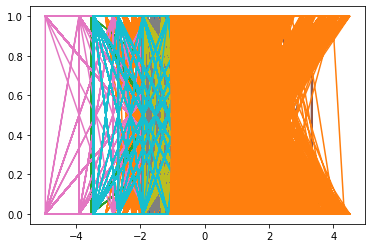

In [ ]:
# just to plot x and y (train data set)
plt.plot(X_train,y_train)

Now we can use knn ,svm,naive bayes for trainning

# In NAIVE BAYES ALGORITHM
* GUASSIAN NAIVE BAYES---(CONTINUES VALUES)
* MULTINOMIAL NB -------- (DISCRETE VALUES)
* BERNOULI NB --------------( BOOLEAN VALUES)


# IN SVC
 kernal can be 
 * rbf,
 * linear
 * poly

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(kernel="poly")
nb=GaussianNB()
lst=[knn,sv,nb]
for model in lst:
  print("\n model---",model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("Accuracy:",accuracy_score(y_test,y_pred)*100)
  print("Classification report:",classification_report(y_test,y_pred))
  print("__"*100)



 model--- KNeighborsClassifier(n_neighbors=3)
Accuracy: 67.5
Classification report:               precision    recall  f1-score   support

         0.0       0.76      0.79      0.77        28
         1.0       0.45      0.42      0.43        12

    accuracy                           0.68        40
   macro avg       0.61      0.60      0.60        40
weighted avg       0.67      0.68      0.67        40

________________________________________________________________________________________________________________________________________________________________________________________________________

 model--- SVC(kernel='poly')
Accuracy: 72.5
Classification report:               precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        28
         1.0       0.57      0.33      0.42        12

    accuracy                           0.73        40
   macro avg       0.66      0.61      0.62        40
weighted avg       0.70      0.72      0.70    

# since the data is imbalanced

In [ ]:
df["target"].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

# we can either use under samplin or over over sampling

# Using over sampling technique

In [ ]:
os=SMOTE(random_state=2)
X_os,y_os=os.fit_resample(X_scaled,y)
y_os.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

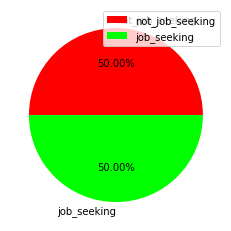

In [99]:
newlabels=["not_job_seeking","job_seeking"]
color=["#FF0000","#00FF00"]
plt.pie(y_os.value_counts(),labels=newlabels,colors=color,autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
# splitting datas as train data and test data
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=40,random_state=80)

In [ ]:
#Trainning data set with multiple algorithms(Knn,svc and naive bayes Algorithm) to find which suits better
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(kernel="poly")
nb=GaussianNB()
lst=[knn,sv,nb]
for model in lst:
  print("\n model---",model)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print("Accuracy",accuracy_score(y_test_os,y_pred_os)*100)
  print("Classification report:",classification_report(y_test_os,y_pred_os))
  print("__"*100)



 model--- KNeighborsClassifier(n_neighbors=3)
Accuracy 77.5
Classification report:               precision    recall  f1-score   support

         0.0       0.93      0.62      0.74        21
         1.0       0.69      0.95      0.80        19

    accuracy                           0.78        40
   macro avg       0.81      0.78      0.77        40
weighted avg       0.82      0.78      0.77        40

________________________________________________________________________________________________________________________________________________________________________________________________________

 model--- SVC(kernel='poly')
Accuracy 77.5
Classification report:               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        21
         1.0       0.81      0.68      0.74        19

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77      

Confusion_Matrix 


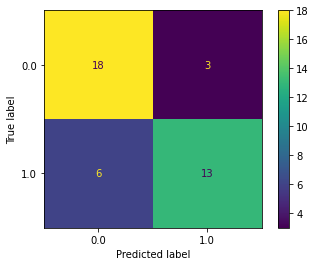

In [ ]:
print("Confusion_Matrix \n",ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))

# Now performing Under sampling Method

In [ ]:
us=RandomUnderSampler()
X_us,y_us=us.fit_resample(X_scaled,y)
y_us.value_counts()

0.0    4777
1.0    4777
Name: target, dtype: int64

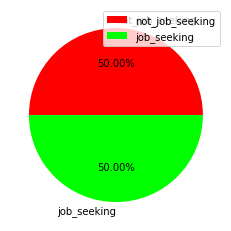

In [98]:
newlabels=["not_job_seeking","job_seeking"]
color=["#FF0000","#00FF00"]
plt.pie(y_us.value_counts(),labels=newlabels,colors=color,autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#Splitting into test and train data
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=40,random_state=80)


In [ ]:
# trainning datastet
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(kernel="poly")
nb=GaussianNB()
lst=[knn,sv,nb]
for model in lst:
  print("\n model---",model)
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print("Accuracy:",accuracy_score(y_test_us,y_pred_us)*100)
  print("Classification report:",classification_report(y_test_us,y_pred_us))
  #print("Confusion_Matrix \n",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("__"*100)



 model--- KNeighborsClassifier(n_neighbors=3)
Accuracy: 70.0
Classification report:               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74        23
         1.0       0.65      0.65      0.65        17

    accuracy                           0.70        40
   macro avg       0.69      0.69      0.69        40
weighted avg       0.70      0.70      0.70        40

________________________________________________________________________________________________________________________________________________________________________________________________________

 model--- SVC(kernel='poly')
Accuracy: 75.0
Classification report:               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        23
         1.0       0.71      0.71      0.71        17

    accuracy                           0.75        40
   macro avg       0.74      0.74      0.74        40
weighted avg       0.75      0.75      0.75    

Confusion_Matrix 


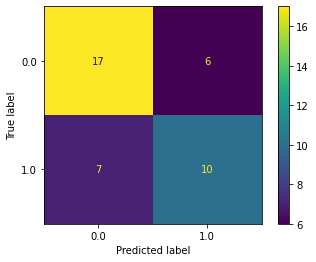

In [ ]:
print("Confusion_Matrix \n",ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us))